In [111]:
#Import important Library
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import talib
import numpy as np

In [ ]:
  #Read from Yahoo financial
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 9, 6)
BTC = web.DataReader('BTC-USD','yahoo',start,end)
ETH = web.DataReader('ETH-USD','yahoo',start,end)
LTC = web.DataReader('LTC-USD','yahoo',start,end)
XRP = web.DataReader('XRP-USD','yahoo',start,end)

In [2]:
#Read CSV from the Folder
BTC = pd.read_csv(r'C:\btc_yahoo.csv')
#Make Date Columns as index
BTC.set_index('Date', inplace=True)
#Make index as DateTime
BTC.index = pd.to_datetime(BTC.index)

In [5]:
#Read CSV from the Folder
ETH = pd.read_csv(r'C:\eth_yahoo.csv')
#Make Date Columns as index
ETH.set_index('Date', inplace=True)
#Make index as DateTime
ETH.index = pd.to_datetime(ETH.index)

In [6]:
#Read CSV from the Folder
LTC = pd.read_csv(r'C:\LTC_yahoo.csv')
#Make Date Columns as index
LTC.set_index('Date', inplace=True)
#Make index as DateTime
LTC.index = pd.to_datetime(LTC.index)

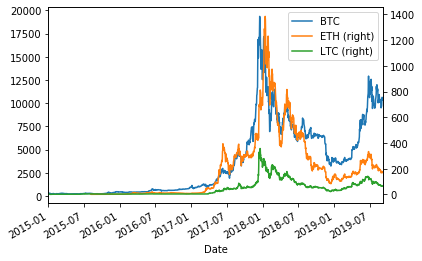

In [8]:
import matplotlib.pyplot as plt
# Plot the Adj_Close columns for SPY and LNG
BTC['Adj Close'].plot(label='BTC', legend=True)
ETH['Adj Close'].plot(label='ETH',  legend=True, secondary_y=True)
LTC['Adj Close'].plot(label='LTC',  legend=True, secondary_y=True)
plt.show()  # show the plot
#plt.clf()  # clear the plot space

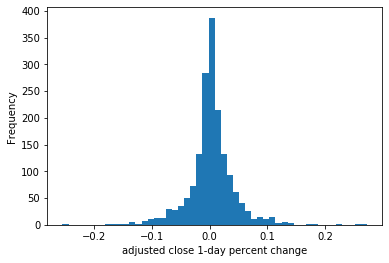

In [93]:
# Histogram of the daily price change percent of Adj_Close for BITCOIN
BTC['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

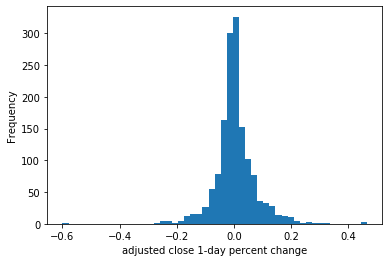

In [94]:
# Histogram of the daily price change percent of Adj_Close for ETH
ETH['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

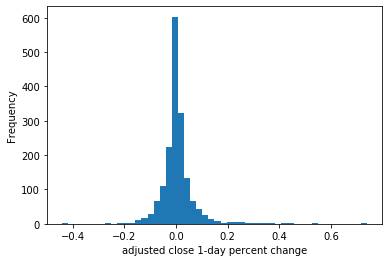

In [95]:
# Histogram of the daily price change percent of Adj_Close for ETH
LTC['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [100]:
#Predict the price Using OHLC_average
df = BTC.copy()
df['OHLC Average'] = (df['Open'] + df['Close'] + df['High'] + df['Low']) / 4
df.head()

,High,Low,Open,Close,Volume,Adj Close,OHLC Average
Date,,,,,,,
2015-01-01,321.359985,313.540009,318.239990,314.890015,4073067,314.890015,317.007500
2015-01-02,316.399994,313.079987,314.890015,315.209991,4673971,315.209991,314.894997
2015-01-03,315.829987,284.890015,315.209991,287.130005,14209564,287.130005,300.764999
2015-01-04,289.940002,255.869995,287.130005,264.720001,24255392,264.720001,274.415001
2015-01-05,278.320007,262.890015,264.720001,274.839996,14995382,274.839996,270.192505


              OHLC Average  Future Close
OHLC Average      1.000000      0.908688
Future Close      0.908688      1.000000


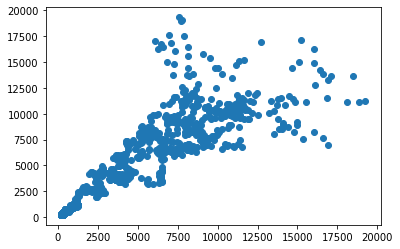

In [109]:
forcasting = 30  # Days, 
df['Future Close'] = df[['Adj Close']].shift(-forcasting)
# Calculate the correlation matrix between the OHLC Average and Adj Close 
corr = df[['OHLC Average', 'Future Close']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df['OHLC Average'], df['Future Close'])
plt.show()

In [112]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,OHLC Average,Future Close
Date,,,,,,,,
2019-09-02,10773.269531,10296.299805,10387.500000,10625.099609,550564712,10625.099609,10520.542236,NaN
2019-09-03,10827.139648,10392.879883,10625.099609,10585.200195,436210232,10585.200195,10607.579834,NaN
2019-09-04,10659.599609,10475.879883,10585.200195,10556.160156,253210793,10556.160156,10569.209961,NaN
2019-09-05,10938.389648,10228.169922,10556.160156,10343.299805,576200161,10343.299805,10516.504883,NaN
2019-09-07,10434.209961,10304.219727,10310.040039,10383.250000,60486868,10383.250000,10357.929932,NaN


# Machine Learning Models

In [125]:
#Preprocessing
columns_drop =['Future Close','Open','Low','High','Close','Adj Close','Volume']
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop(columns_drop,axis=1)
X=preprocessing.scale(X)#To scale our values to input them in our model
y=df['Future Close'] #Future Close column will be our target ('label')

In [133]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

# Import package for ML Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [134]:
#Create and train Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)

#Create and train the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)   ##Train the model

#Create and Train the RandomForestRegressor Model
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)

# KNN Regression
knnreg = KNeighborsRegressor(n_neighbors=2)
knnreg.fit(X_train, y_train)

# Quadratic Regression 2
qrpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
qrpoly2.fit(X_train, y_train)

# Quadratic Regression 3
qrpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
qrpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [136]:
#Test Model : Score Return R^2 of the prediction
#Best possible score is 1.0
svr_confidence = svr_rbf.score(X_test, y_test)
print("svr confidence: ", svr_confidence * 100,'%')
lr_confidence = lr.score(X_test, y_test)
print("lr confidence: ", lr_confidence * 100,'%')
reg_confidence = reg.score(X_test, y_test)
print("Reg confidence: ", reg_confidence * 100,'%')
knnreg_confidence = knnreg.score(X_test, y_test)
print("knn confidence: ", knnreg_confidence * 100,'%')
qrpoly2_confidence = qrpoly2.score(X_test, y_test)
print("qrpoly2 confidence: ", qrpoly2_confidence * 100,'%')
qrpoly3_confidence = qrpoly3.score(X_test, y_test)
print("qrpoly3 confidence: ", qrpoly3_confidence * 100,'%')

svr confidence:  84.61862576514153 %
lr confidence:  80.96636794609037 %
Reg confidence:  82.3085608801807 %
knn confidence:  81.15523239863268 %
qrpoly2 confidence:  84.97930150430406 %
qrpoly3 confidence:  84.96987026725054 %


In [145]:
preds = svr_rbf.predict(X_test)
print("The prediction(SVR) is:",preds[1],". The real value is:" ,y_test[1])

The prediction(SVR) is: 312.1670403246253 . The real value is: 327.5199890136719


In [149]:
#Apply our model and get our prediction
X_forcasting=X[-forcasting:]# We'll take the last 30 (forcasting) elements to make  predictions 
svr_rbf.predict(X_forcasting)  # Price for 30 Days using svr_rbf

array([10578.17306384, 10346.52648288, 10311.93948428, 10279.34149936,
        9995.09639901,  9859.4811958 ,  9687.50025371,  9333.49152613,
        9652.13096553,  9867.14390727,  9951.94389635,  9921.45705787,
        9816.87167566,  9641.99413616,  9466.48488168,  9538.42239377,
        9496.2602709 ,  9430.86912119,  9264.16791098,  9326.63554082,
        9341.9048461 ,  9510.8789074 ,  9715.68687353,  9852.58080526,
        9952.87505674, 10030.70323742, 10268.39771827, 10370.90041067,
       10384.83551337, 10429.81416492])